In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.8703703703703703, Loss: 0.3288009078414352
Checkpoint 200, Accuracy: 0.9567901234567902, Loss: 0.2848660504376447
Checkpoint 300, Accuracy: 0.9629629629629629, Loss: 0.26361557289406107
Checkpoint 400, Accuracy: 0.9567901234567902, Loss: 0.23972838013260453
Checkpoint 500, Accuracy: 0.9567901234567902, Loss: 0.21653044665301288


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9237555  0.06120832 0.01503612]
[1. 0. 0.] <-> [0.9407512  0.05626975 0.002979  ]
[1. 0. 0.] <-> [0.94376713 0.05109531 0.00513763]
[1. 0. 0.] <-> [0.9687329  0.02013324 0.01113389]
[0. 0. 1.] <-> [0.60286313 0.02238173 0.37475514]
[1. 0. 0.] <-> [0.9130593  0.08399349 0.00294722]
[1. 0. 0.] <-> [0.92890483 0.01003128 0.0610639 ]
[1. 0. 0.] <-> [0.97132146 0.01579593 0.01288265]
[1. 0. 0.] <-> [0.94574684 0.04194222 0.01231092]
[1. 0. 0.] <-> [0.9113907  0.02298685 0.06562238]
[1. 0. 0.] <-> [0.83332926 0.01091384 0.15575688]
[1. 0. 0.] <-> [0.92559874 0.04909455 0.02530672]
[1. 0. 0.] <-> [0.96124125 0.02376998 0.01498875]
[0. 1. 0.] <-> [9.6728444e-02 9.0314823e-01 1.2325549e-04]
[0. 1. 0.] <-> [9.1529459e-02 9.0835965e-01 1.1087481e-04]
[1. 0. 0.] <-> [0.9204449  0.01741702 0.062138  ]
[0. 1. 0.] <-> [1.0467754e-01 8.9519060e-01 1.3193719e-04]
[1. 0. 0.] <-> [0.954974   0.03549741 0.00952855]
[1. 0. 0.] <-> [0.9562631  0.02621097 0.01752591]
[1. 0. 0.] <-> [0.71875

In [12]:
# Testing Performance

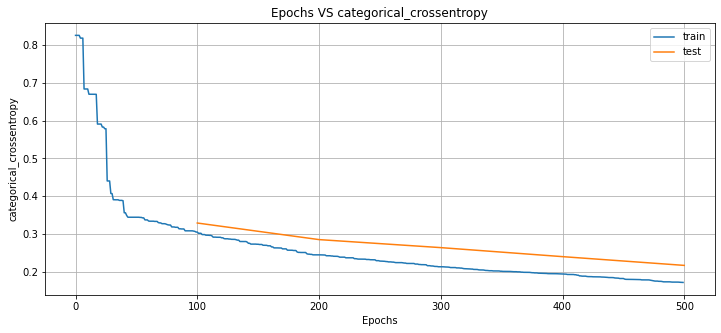

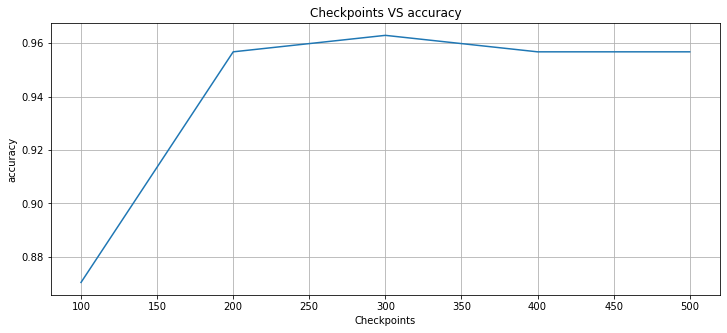

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8703703703703703, 'mean_square_error': 0.2030330189252383, 'categorical_crossentropy': 0.3288009078414352, 'precision': 0.8055555555555556, 'recall': 0.8055555555555556, 'f1': 0.8055555555555556, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 21, 'tn_hit': 9, 'fn_hit': 0}, 1: {'tp_hit': 9, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 7}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 100} 


{'accuracy': 0.9567901234567902, 'mean_square_error': 0.1560710895377468, 'categorical_crossentropy': 0.2848660504376447, 'precision': 0.9351851851851852, 'recall': 0.9351851851851852, 'f1': 0.9351851851851852, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 7, 'tn_hit': 23, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 4}, 2: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 3}}, 'checkpoint': 200} 


{'accuracy': 0.9629629629629629, 'mean_square_error': 0.1365857761137238, 'categorical_crossentropy': 0.26361557289406107, 'precision':

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-0.9594351  2.3519633  2.0379274 -2.0107214 -2.6969368]
 bias: 1.9705103635787964

Neuron 1: weights:
[-0.5376109  1.4020537  1.9689059 -1.9039235 -0.2723638]
 bias: -1.7294855117797852

Neuron 2: weights:
[-2.8621461   1.9011983  -2.2045465   0.49440396 -2.5260694 ]
 bias: -0.5450371503829956

Neuron 3: weights:
[-1.6888962   1.8635753   2.8883376  -0.96441627 -0.08324781]
 bias: 0.9785611033439636

$
Layer 2
Neuron 0: weights:
[ 2.689372  -2.728821   0.9828424  1.3095256]
 bias: 1.953916311264038

Neuron 1: weights:
[0.8666886 2.04861   3.        2.9855738]
 bias: -2.3982439041137695

Neuron 2: weights:
[-1.3063637  -2.0408735  -1.8266687  -0.33628976]
 bias: 3.0

$

